In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("Nvidia_stock_data.csv")

In [11]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037607,0.044770,0.035577,0.040114,2714688000
1,1999-01-25,0.041547,0.042024,0.037607,0.040591,510480000
2,1999-01-26,0.038323,0.042860,0.037726,0.042024,343200000
3,1999-01-27,0.038204,0.039398,0.036293,0.038442,244368000
4,1999-01-28,0.038084,0.038442,0.037845,0.038204,227520000


In [17]:
df['Date']=pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace = True)

In [19]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037607,0.044770,0.035577,0.040114,2714688000
1,1999-01-25,0.041547,0.042024,0.037607,0.040591,510480000
2,1999-01-26,0.038323,0.042860,0.037726,0.042024,343200000
3,1999-01-27,0.038204,0.039398,0.036293,0.038442,244368000
4,1999-01-28,0.038084,0.038442,0.037845,0.038204,227520000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6752 entries, 0 to 6751
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6752 non-null   datetime64[ns]
 1   Close   6752 non-null   float64       
 2   High    6752 non-null   float64       
 3   Low     6752 non-null   float64       
 4   Open    6752 non-null   float64       
 5   Volume  6752 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 316.6 KB


In [25]:
df.tail()

,Date,Close,High,Low,Open,Volume
6747,2025-11-17,186.600006,189.000000,184.320007,185.970001,173628900
6748,2025-11-18,181.360001,184.800003,179.649994,183.380005,213598900
6749,2025-11-19,186.520004,187.860001,182.830002,184.789993,247246400
6750,2025-11-20,180.639999,196.000000,179.850006,195.949997,343504800
6751,2025-11-21,178.880005,184.559998,172.929993,181.240005,346068500


In [29]:
df.shape

(6752, 6)

In [31]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [33]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [35]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,6752,6752.000000,6752.000000,6752.000000,6752.000000,6.752000e+03
mean,2012-06-22 04:58:21.895734528,12.919337,13.142801,12.674236,12.921722,5.881710e+08
min,1999-01-22 00:00:00,0.031280,0.032593,0.030563,0.031996,1.968000e+07
25%,2005-10-06 18:00:00,0.261905,0.269622,0.254522,0.261618,3.238551e+08
50%,2012-06-20 12:00:00,0.446917,0.453614,0.439349,0.446217,4.906260e+08
75%,2019-03-08 18:00:00,5.404118,5.533813,5.335596,5.410119,7.206120e+08
max,2025-11-21 00:00:00,207.039993,212.190002,205.559998,208.080002,9.230856e+09
std,NaN,34.136615,34.700821,33.527608,34.164948,4.294652e+08


In [37]:
if df.isnull().values.any():
    print("Missing values detected! Cleaning data..")
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
else:
    print("No missing values found")

No missing values found


In [85]:
from matplotlib.ticker import MultipleLocator

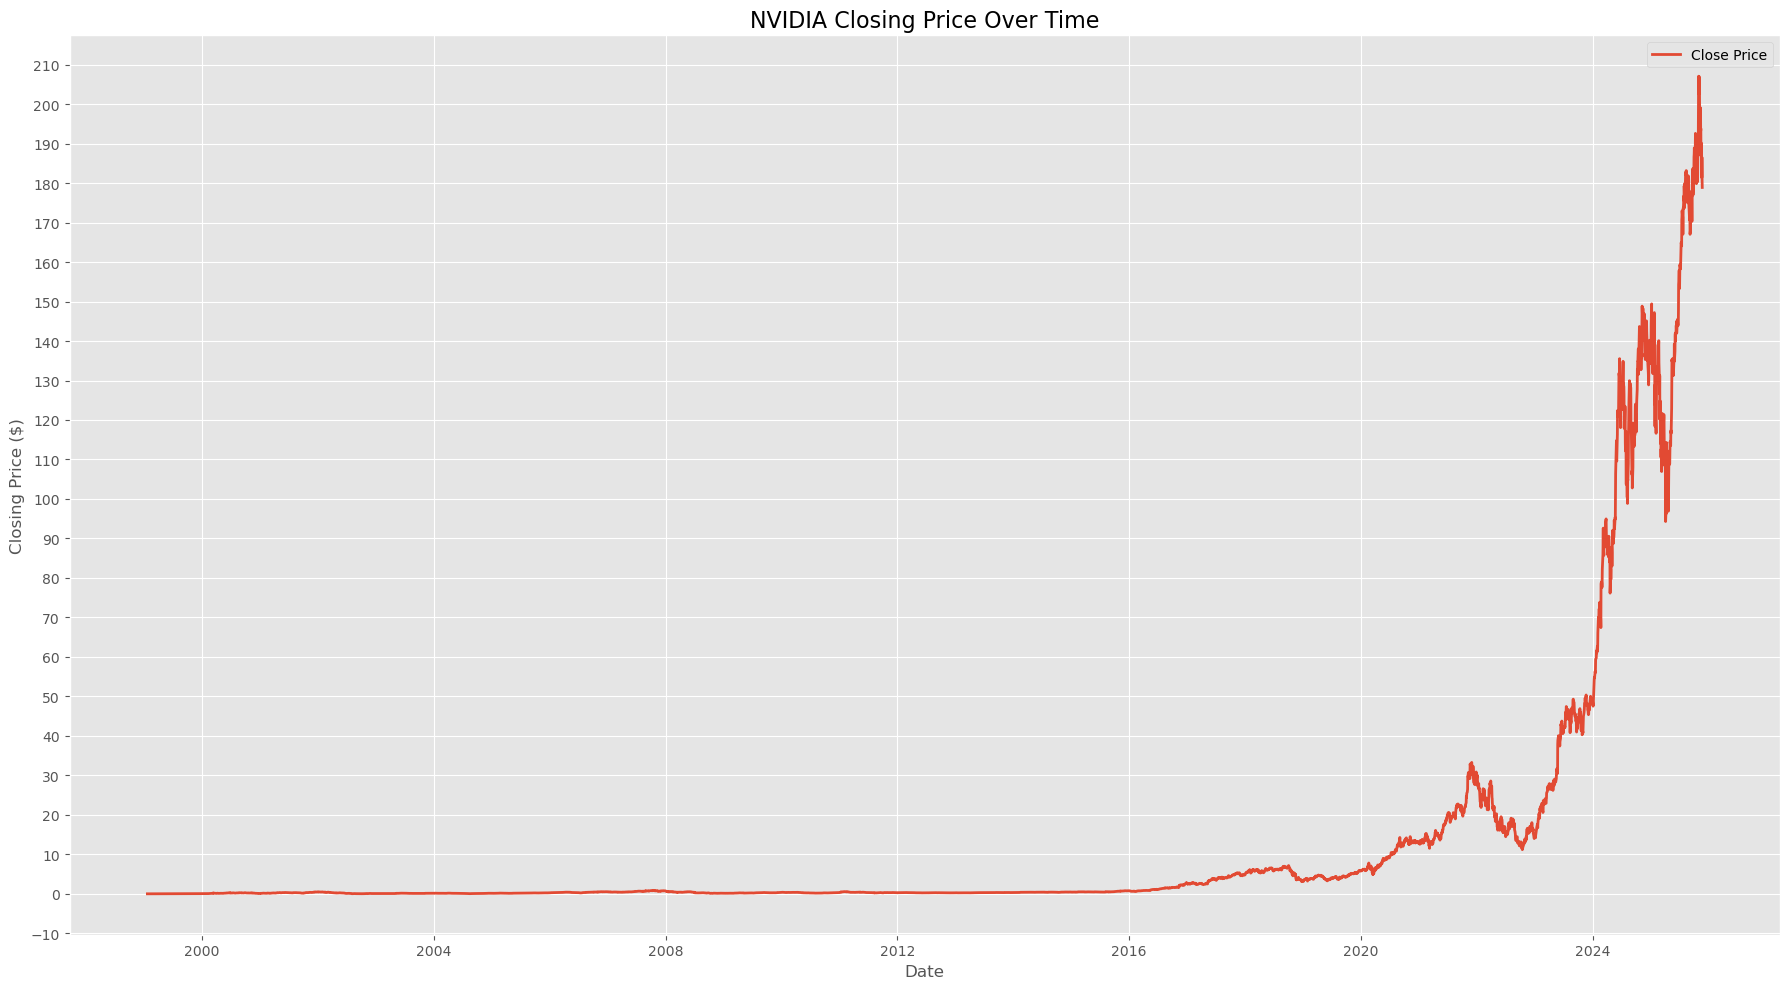

In [91]:
plt.style.use("ggplot")
plt.figure(figsize=(18,10))
plt.plot(df['Date'], df['Close'], label="Close Price", linewidth=2)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.title("NVIDIA Closing Price Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. Trade volume over time

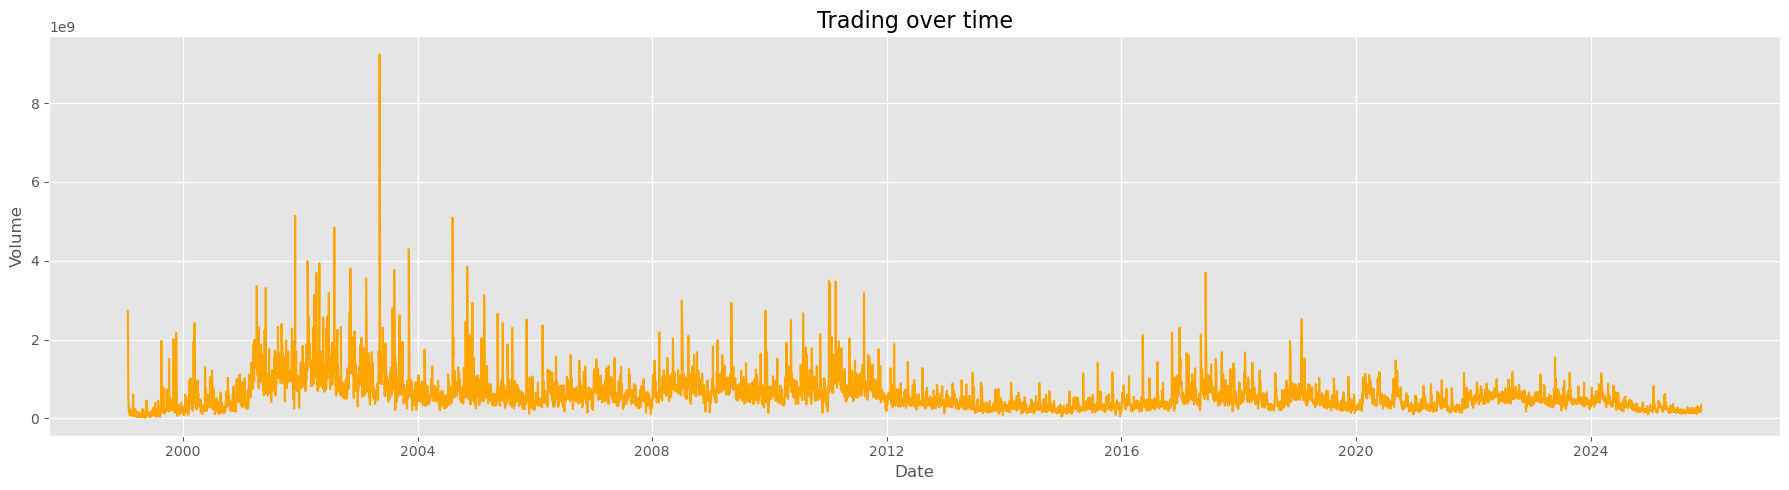

In [95]:
plt.figure(figsize=(18,5))
plt.plot(df['Date'], df['Volume'], color='orange', linewidth=1.5)
plt.title("Trading over time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

In [97]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037607,0.044770,0.035577,0.040114,2714688000
1,1999-01-25,0.041547,0.042024,0.037607,0.040591,510480000
2,1999-01-26,0.038323,0.042860,0.037726,0.042024,343200000
3,1999-01-27,0.038204,0.039398,0.036293,0.038442,244368000
4,1999-01-28,0.038084,0.038442,0.037845,0.038204,227520000


3. High Vs Low Spread between the timeline of 2018 and 2025


In [109]:
df_period = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2025-12-31')]

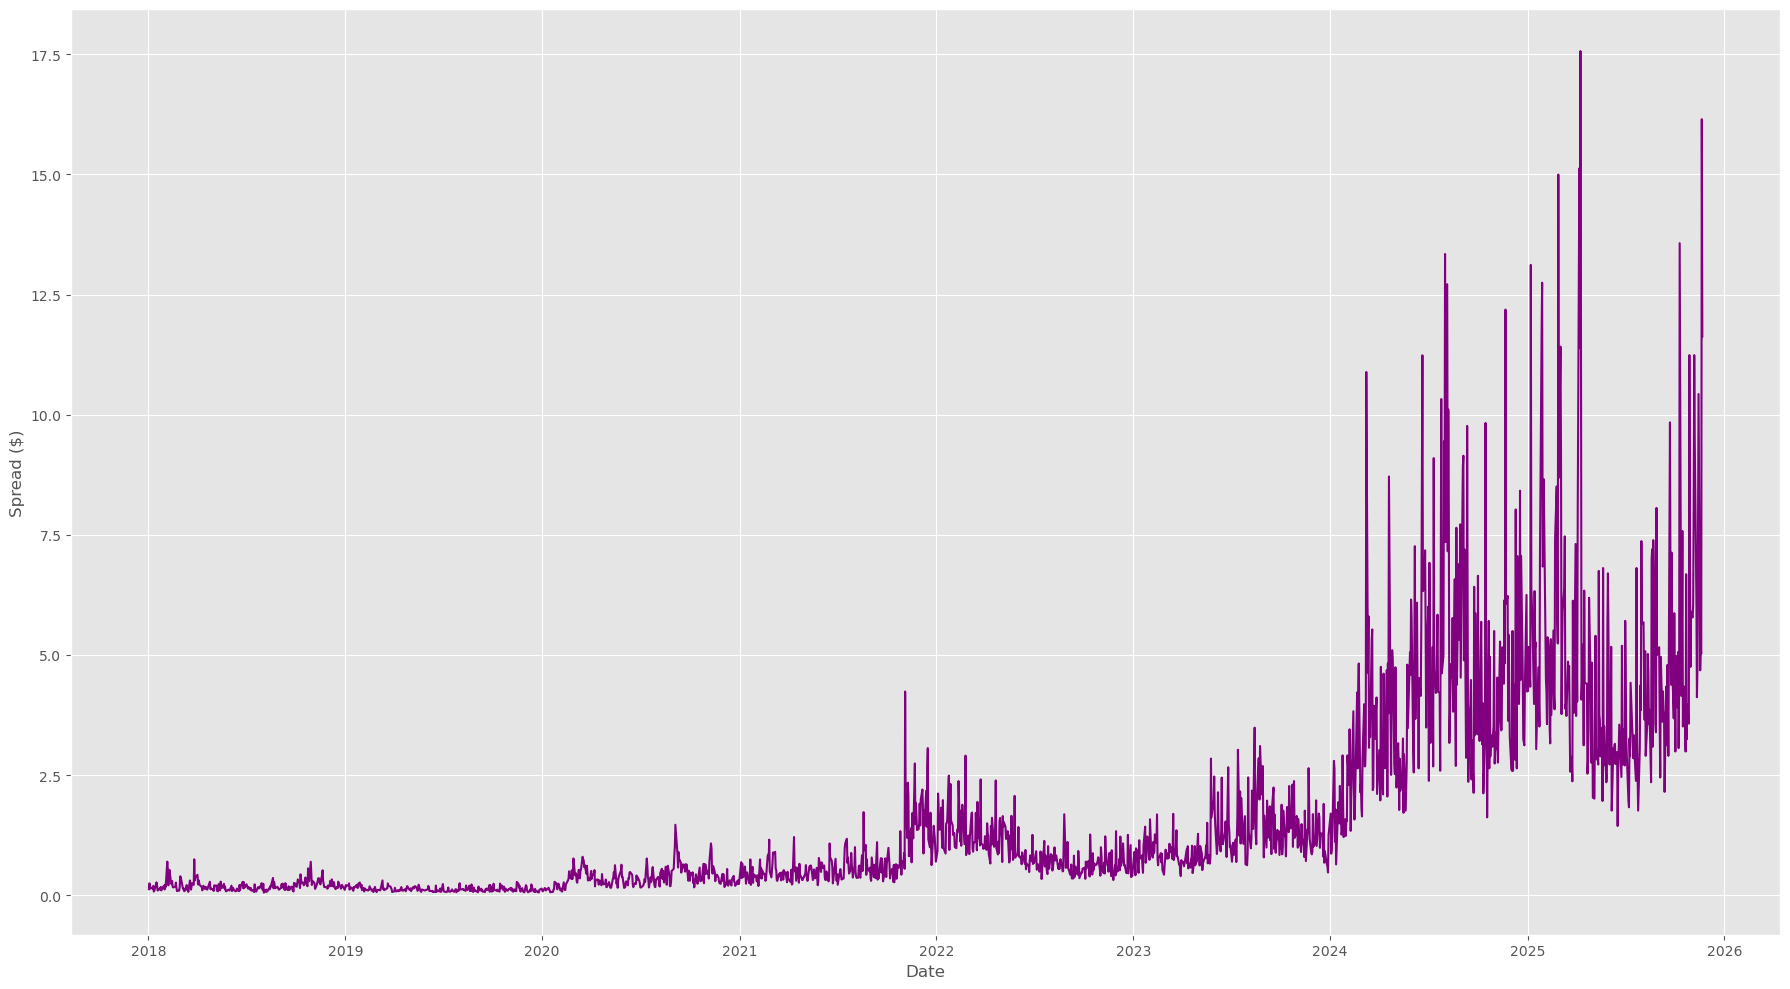

In [114]:
df_period['High_Low_Spread']=df_period['High']-df_period['Low']
plt.figure(figsize=(18, 10))
plt.plot(df_period['Date'], df_period['High_Low_Spread'], color='purple')
plt.xlabel("Date")
plt.ylabel("Spread ($)")
plt.tight_layout()
plt.show()

4. Rolling Average with Actual Prices

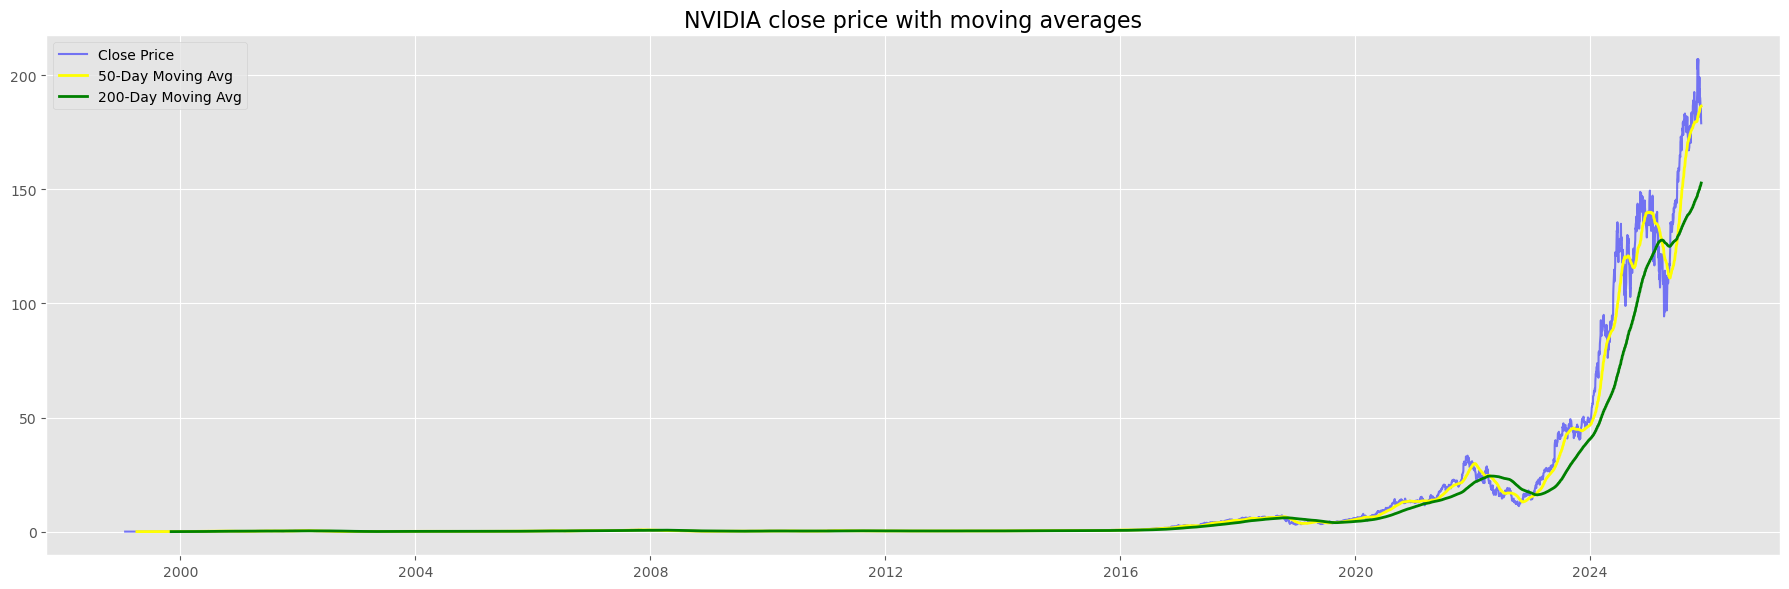

In [124]:
df['MA50']=df['Close'].rolling(window=50).mean()
df['MA200']=df['Close'].rolling(window=200).mean()

plt.figure(figsize=(18, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color = 'blue', alpha=0.5)
plt.plot(df['Date'], df['MA50'], label='50-Day Moving Avg', color = 'yellow', linewidth=2)
plt.plot(df['Date'], df['MA200'], label='200-Day Moving Avg', color = 'green', linewidth=2)
plt.title("NVIDIA close price with moving averages", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

5. Correlation Heatmap

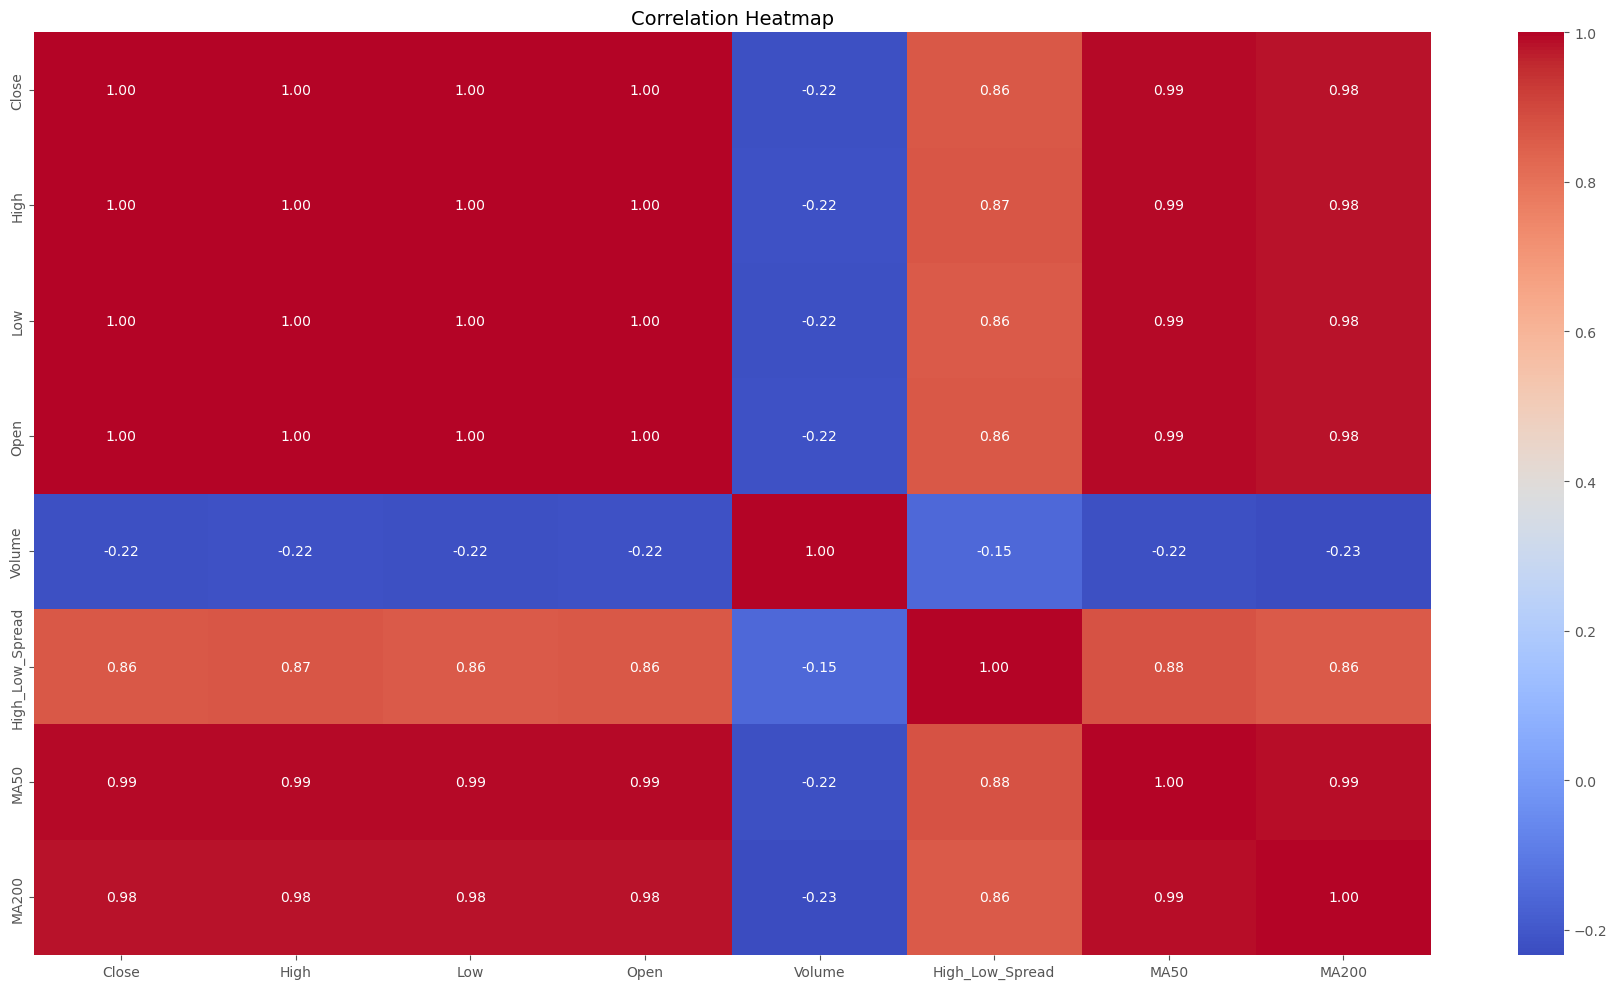

In [141]:
plt.figure(figsize = (18,10))
sns.heatmap(df.drop(columns=['Date']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

6. Volume vs Closing Price

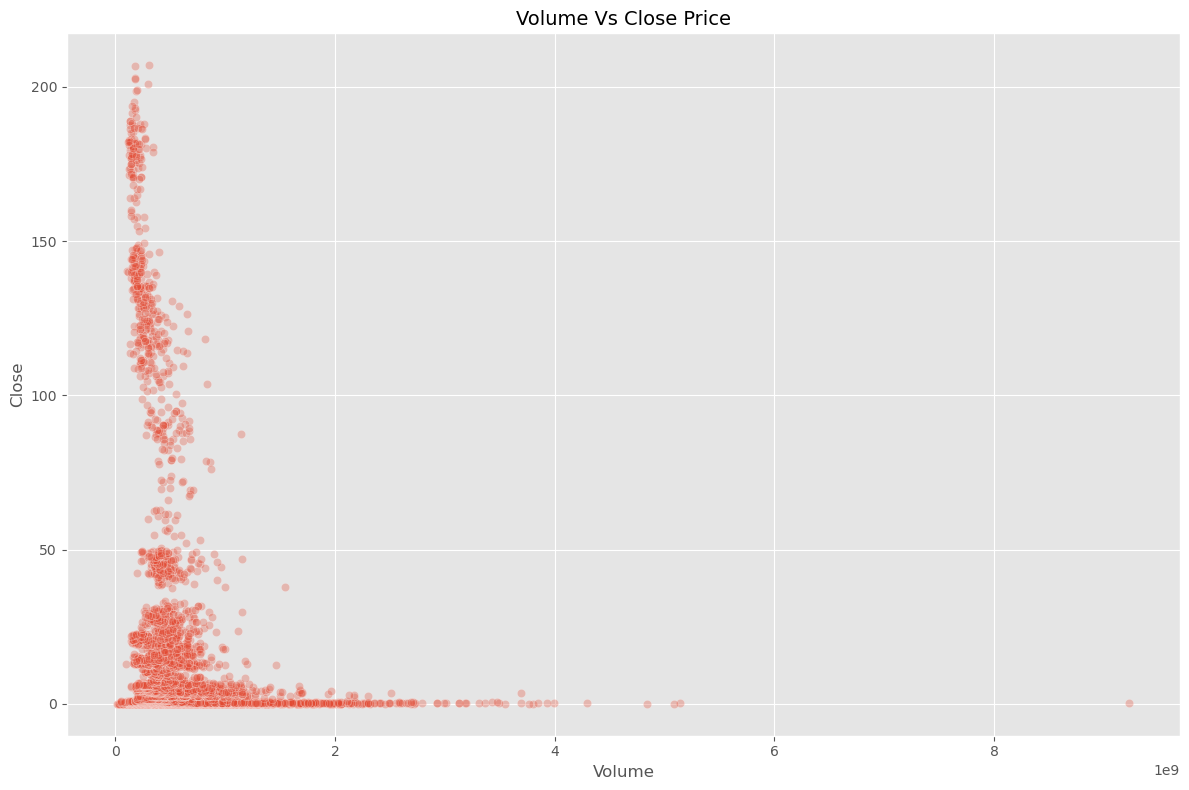

In [144]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.3)
plt.title("Volume Vs Close Price", fontsize=14)
plt.tight_layout()
plt.show()

7. Applying Machine Learning Techniques